In [ ]:
!nvidia-smi

Fri Sep 27 04:07:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Function to calculate mean RGB values for each photo
def mean_rgb(image_path):
    image = cv2.imread(image_path)
    # Convert image to RGB format (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Calculate mean of R, G, B
    mean_colors = np.mean(image_rgb, axis=(0, 1))
    return mean_colors

# Function to process a folder with 3 photos and return the mean RGB values
def process_folder(folder_path):
    mean_r, mean_g, mean_b = [], [], []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Assuming images are in jpg or png format
            image_path = os.path.join(folder_path, filename)
            mean_colors = mean_rgb(image_path)
            mean_r.append(mean_colors[0])
            mean_g.append(mean_colors[1])
            mean_b.append(mean_colors[2])

    # Return average of the RGB values across the 3 photos in the folder
    return np.mean(mean_r), np.mean(mean_g), np.mean(mean_b)

# Function to perform linear regression and calculate R2
def linear_regression(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)
    return model, r2, y_pred

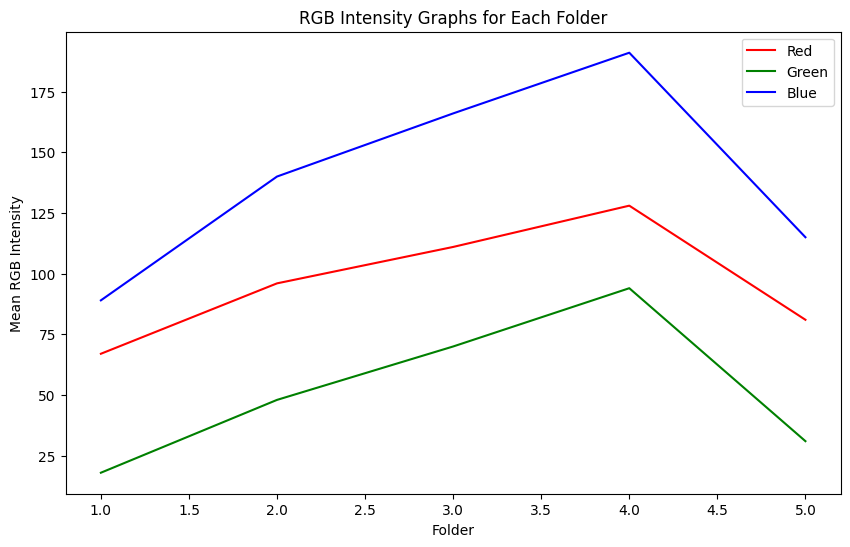

The best color channel for molarity calculation is Blue with R² = 0.1631


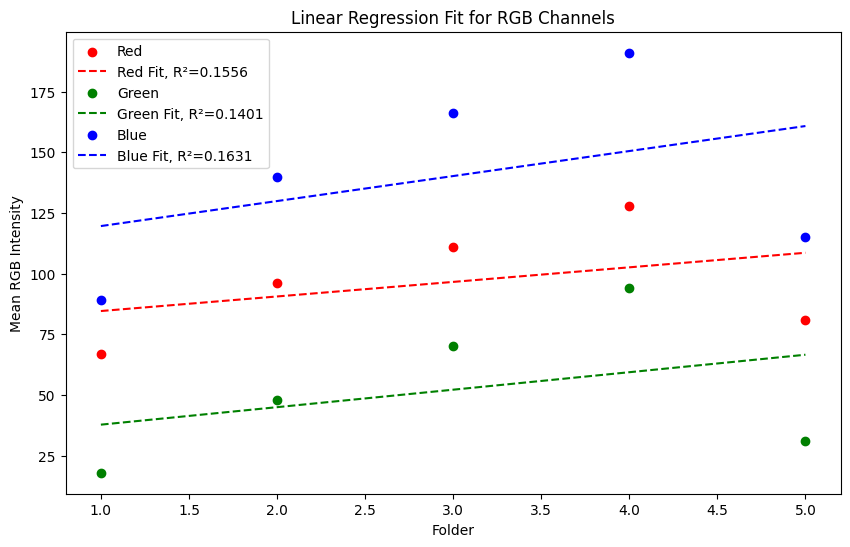

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Main code to process 5 folders
folder_paths = ['/content/drive/MyDrive/color analysis/sample1', '/content/drive/MyDrive/color analysis/sample2', '/content/drive/MyDrive/color analysis/sample3', '/content/drive/MyDrive/color analysis/sample4', '/content/drive/MyDrive/color analysis/sample5']  # Replace with actual folder paths
mean_rgb_values = []

for folder in folder_paths:
    mean_r, mean_g, mean_b = process_folder(folder)
    mean_rgb_values.append([mean_r, mean_g, mean_b])

mean_rgb_values = np.array(mean_rgb_values)
x = np.arange(1, 6)  # Assuming 5 folders

# Plot RGB intensities
plt.figure(figsize=(10, 6))
plt.plot(x, mean_rgb_values[:, 0], 'r-', label='Red')
plt.plot(x, mean_rgb_values[:, 1], 'g-', label='Green')
plt.plot(x, mean_rgb_values[:, 2], 'b-', label='Blue')
plt.xlabel('Folder')
plt.ylabel('Mean RGB Intensity')
plt.title('RGB Intensity Graphs for Each Folder')
plt.legend()
plt.show()

# Perform linear regression for each channel
r_model, r_r2, r_pred = linear_regression(x, mean_rgb_values[:, 0])
g_model, g_r2, g_pred = linear_regression(x, mean_rgb_values[:, 1])
b_model, b_r2, b_pred = linear_regression(x, mean_rgb_values[:, 2])

# Choose the color channel with the highest R2
best_r2 = max(r_r2, g_r2, b_r2)
if best_r2 == r_r2:
    best_color = 'Red'
    best_model = r_model
elif best_r2 == g_r2:
    best_color = 'Green'
    best_model = g_model
else:
    best_color = 'Blue'
    best_model = b_model

print(f"The best color channel for molarity calculation is {best_color} with R² = {best_r2:.4f}")

# Display linear regression lines
plt.figure(figsize=(10, 6))
plt.scatter(x, mean_rgb_values[:, 0], color='r', label='Red')
plt.plot(x, r_pred, 'r--', label=f'Red Fit, R²={r_r2:.4f}')

plt.scatter(x, mean_rgb_values[:, 1], color='g', label='Green')
plt.plot(x, g_pred, 'g--', label=f'Green Fit, R²={g_r2:.4f}')

plt.scatter(x, mean_rgb_values[:, 2], color='b', label='Blue')
plt.plot(x, b_pred, 'b--', label=f'Blue Fit, R²={b_r2:.4f}')

plt.xlabel('Folder')
plt.ylabel('Mean RGB Intensity')
plt.title('Linear Regression Fit for RGB Channels')
plt.legend()
plt.show()

# Define the mathematical equation for molarity based on the best-fit color channel
def calculate_molarity(photo_path):
    mean_color = mean_rgb(photo_path)[0 if best_color == 'Red' else 1 if best_color == 'Green' else 2]
    molarity = best_model.predict([[mean_color]])[0]
    return molarity

# Example usage to calculate molarity for a new set of photos
new_photo_path = 'path_to_new_photo.jpg'  # Replace with an actual photo path
molarity = calculate_molarity(new_photo_path)
print(f"Calculated molarity for the specimen: {molarity:.4f}")

In [ ]:
# Perform linear regression for each channel
r_model, r_r2, r_pred = linear_regression(x, mean_rgb_values[:, 0])
g_model, g_r2, g_pred = linear_regression(x, mean_rgb_values[:, 1])
b_model, b_r2, b_pred = linear_regression(x, mean_rgb_values[:, 2])

# Choose the color channel with the highest R2
best_r2 = max(r_r2, g_r2, b_r2)
if best_r2 == r_r2:
    best_color = 'Red'
    best_model = r_model
elif best_r2 == g_r2:
    best_color = 'Green'
    best_model = g_model
else:
    best_color = 'Blue'
    best_model = b_model

print(f"The best color channel for molarity calculation is {best_color} with R² = {best_r2:.4f}")

The best color channel for molarity calculation is Blue with R² = 0.1631


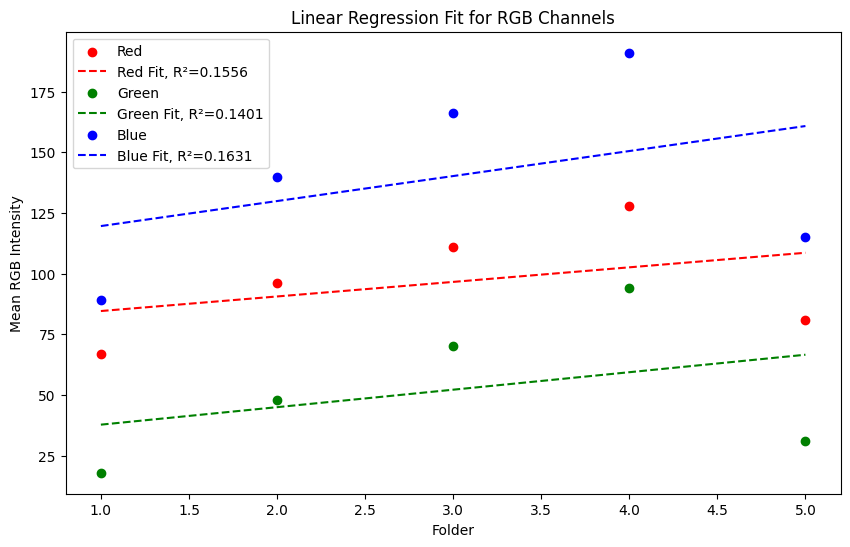

In [ ]:
# Display linear regression lines
plt.figure(figsize=(10, 6))
plt.scatter(x, mean_rgb_values[:, 0], color='r', label='Red')
plt.plot(x, r_pred, 'r--', label=f'Red Fit, R²={r_r2:.4f}')

plt.scatter(x, mean_rgb_values[:, 1], color='g', label='Green')
plt.plot(x, g_pred, 'g--', label=f'Green Fit, R²={g_r2:.4f}')

plt.scatter(x, mean_rgb_values[:, 2], color='b', label='Blue')
plt.plot(x, b_pred, 'b--', label=f'Blue Fit, R²={b_r2:.4f}')

plt.xlabel('Folder')
plt.ylabel('Mean RGB Intensity')
plt.title('Linear Regression Fit for RGB Channels')
plt.legend()
plt.show()

In [ ]:
# Define the mathematical equation for molarity based on the best-fit color channel
def calculate_molarity(photo_path):
    mean_color = mean_rgb(photo_path)[0 if best_color == 'Red' else 1 if best_color == 'Green' else 2]
    molarity = best_model.predict([[mean_color]])[0]
    return molarity

In [ ]:
# Example usage to calculate molarity for a new set of photos
new_photo_path = '/content/drive/MyDrive/color analysis/images.jpeg'  # Replace with an actual photo path
molarity = calculate_molarity(new_photo_path)
print(f"Calculated molarity for the specimen: {molarity:.4f}")

Calculated molarity for the specimen: 1412.2665
